# Dataset Analysis
**You will find a complete description of the database as well as an analysis focused on delays.**

# 1 - Discovering the Dataset

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import folium

# Affichage de toute les colonnes
pd.set_option('display.max_columns', None)

# Ignorer les avertissements FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Path vers la base Kaggle
link_path = "../data/US 2023 Civil Flights  delays meteo and aircrafts/US_flights_2023.csv"

# Importation du dataset
df_flight = pd.read_csv(link_path)

# Typage de la colonne FlightDate au format datetime
df_flight['FlightDate'] = pd.to_datetime(df_flight['FlightDate'])

# Ajout d'une clé primaire unique en dur
df_flight = df_flight.reset_index(drop =False)

# Affichage des 10 premières lignes
df_flight.head(10)

index FlightDate  Day_Of_Week       Airline Tail_Number Dep_Airport  \
0      0 2023-01-02            1  Endeavor Air      N605LR         BDL   
1      1 2023-01-03            2  Endeavor Air      N605LR         BDL   
2      2 2023-01-04            3  Endeavor Air      N331PQ         BDL   
3      3 2023-01-05            4  Endeavor Air      N906XJ         BDL   
4      4 2023-01-06            5  Endeavor Air      N337PQ         BDL   
5      5 2023-01-07            6  Endeavor Air      N336PQ         BDL   
6      6 2023-01-14            6  Endeavor Air      N311PQ         LGA   
7      7 2023-01-21            6  Endeavor Air      N917XJ         LGA   
8      8 2023-01-28            6  Endeavor Air      N336PQ         LGA   
9      9 2023-01-09            1  Endeavor Air      N491PX         LGA   

   Dep_CityName DepTime_label  Dep_Delay  Dep_Delay_Tag Dep_Delay_Type  \
0  Hartford, CT       Morning         -3              0      Low <5min   
1  Hartford, CT       Morning         -5              0      Low <5min   
2  Hartford, CT       Morning         -5              0      Low <5min   
3  Hartford, CT       Morning         -6              0      Low <5min   
4  Hartford, CT       Morning         -1              0      Low <5min   
5  Hartford, CT       Morning        -10              0      Low <5min   
6  New York, NY     Afternoon         -8              0      Low <5min   
7  New York, NY     Afternoon        -10              0      Low <5min   
8  New York, NY     Afternoon         -5              0      Low <5min   
9  New York, NY       Evening         -7              0      Low <5min   

  Arr_Airport    Arr_CityName  Arr_Delay Arr_Delay_Type  Flight_Duration  \
0         LGA    New York, NY        -12      Low <5min               56   
1         LGA    New York, NY         -8      Low <5min               62   
2         LGA    New York, NY        -21      Low <5min               49   
3         LGA    New York, NY        -17      Low <5min               54   
4         LGA    New York, NY        -16      Low <5min               50   
5         LGA    New York, NY        -13      Low <5min               62   
6         CVG  Cincinnati, OH        -31      Low <5min              117   
7         CVG  Cincinnati, OH        -25      Low <5min              125   
8         CVG  Cincinnati, OH        -15      Low <5min              130   
9         BGM  Binghamton, NY         -3      Low <5min               63   

        Distance_type  Delay_Carrier  Delay_Weather  Delay_NAS  \
0  Short Haul >1500Mi              0              0          0   
1  Short Haul >1500Mi              0              0          0   
2  Short Haul >1500Mi              0              0          0   
3  Short Haul >1500Mi              0              0          0   
4  Short Haul >1500Mi              0              0          0   
5  Short Haul >1500Mi              0              0          0   
6  Short Haul >1500Mi              0              0          0   
7  Short Haul >1500Mi              0              0          0   
8  Short Haul >1500Mi              0              0          0   
9  Short Haul >1500Mi              0              0          0   

   Delay_Security  Delay_LastAircraft           Manufacturer Model  \
0               0                   0  CANADAIR REGIONAL JET   CRJ   
1               0                   0  CANADAIR REGIONAL JET   CRJ   
2               0                   0  CANADAIR REGIONAL JET   CRJ   
3               0                   0  CANADAIR REGIONAL JET   CRJ   
4               0                   0  CANADAIR REGIONAL JET   CRJ   
5               0                   0  CANADAIR REGIONAL JET   CRJ   
6               0                   0  CANADAIR REGIONAL JET   CRJ   
7               0                   0  CANADAIR REGIONAL JET   CRJ   
8               0                   0  CANADAIR REGIONAL JET   CRJ   
9               0                   0  CANADAIR REGIONAL JET   CRJ   

   Aicraft_age  
0           16  
1   

In [2]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6743404 entries, 0 to 6743403
Data columns (total 25 columns):
 #   Column              Dtype         
---  ------              -----         
 0   index               int64         
 1   FlightDate          datetime64[ns]
 2   Day_Of_Week         int64         
 3   Airline             object        
 4   Tail_Number         object        
 5   Dep_Airport         object        
 6   Dep_CityName        object        
 7   DepTime_label       object        
 8   Dep_Delay           int64         
 9   Dep_Delay_Tag       int64         
 10  Dep_Delay_Type      object        
 11  Arr_Airport         object        
 12  Arr_CityName        object        
 13  Arr_Delay           int64         
 14  Arr_Delay_Type      object        
 15  Flight_Duration     int64         
 16  Distance_type       object        
 17  Delay_Carrier       int64         
 18  Delay_Weather       int64         
 19  Delay_NAS           int64         
 20  De

**The dataset contains 6,743,403 rows and 24 columns.**
- 12 columns in 'int' format
- 13 columns in 'object' format, including the 'DateFlight' column
- Dataset size: 1.3 GB

In [3]:
df_flight.isnull().sum()

index                 0
FlightDate            0
Day_Of_Week           0
Airline               0
Tail_Number           0
Dep_Airport           0
Dep_CityName          0
DepTime_label         0
Dep_Delay             0
Dep_Delay_Tag         0
Dep_Delay_Type        0
Arr_Airport           0
Arr_CityName          0
Arr_Delay             0
Arr_Delay_Type        0
Flight_Duration       0
Distance_type         0
Delay_Carrier         0
Delay_Weather         0
Delay_NAS             0
Delay_Security        0
Delay_LastAircraft    0
Manufacturer          0
Model                 0
Aicraft_age           0
dtype: int64

**No presence of Null values**

In [4]:
df_flight.select_dtypes('object').describe(include = 'all').T

count unique                     top     freq
Airline         6743404     15  Southwest Airlines Co.  1421238
Tail_Number     6743404   5963                  N488HA     3327
Dep_Airport     6743404    350                     ATL   332935
Dep_CityName    6743404    344             Chicago, IL   338766
DepTime_label   6743404      4                 Morning  2611567
Dep_Delay_Type  6743404      3               Low <5min  5409737
Arr_Airport     6743404    350                     ATL   332941
Arr_CityName    6743404    344             Chicago, IL   338319
Arr_Delay_Type  6743404      3               Low <5min  5403727
Distance_type   6743404      3      Short Haul >1500Mi  5872159
Manufacturer    6743404      5                  BOEING  3122320
Model           6743404     21                  737 NG  2703494

**Analysis of Categorical Columns:**

- **Airline:** Contains the names of the **15 airlines** present in the dataset.
- **Tail_Number:** Unique identifier of the aircraft. **5963 aircraft** are present.
- **Dep_Airport:** Unique identifier of each departure airport. **350 airports** are represented.
- **Dep_CityName:** Names of the departure cities. **344 cities** are represented.
- **DepTime_label:** Division of the day into 6-hour periods (Night - Morning - Afternoon - Evening).
- **Dep_Delay_Type:** 3 categories of departure delays (Low < 5min - Medium > 15min - High > 60min).
- **CityName:** Names of the arrival cities. 344 cities are represented.
- **Arr_Delay_Type:** 3 categories of arrival delays (Low < 5min - Medium > 15min - High > 60min).
- **Distance_type:** 3 categories of flight distances in miles (Short Haul < 1500Mi, Medium Haul < 3000Mi, Long Haul < 6000Mi).
- **Manufacturer:** Aircraft manufacturer. **5 aircraft manufacturers** are present.
- **Model:** Model name given by the manufacturer. 21 aircraft models are present.


In [5]:
df_flight.describe().T

count                           mean  \
index               6743404.0                      3371701.5   
FlightDate            6743404  2023-07-04 07:06:16.929396480   
Day_Of_Week         6743404.0                       3.982793   
Dep_Delay           6743404.0                      12.200987   
Dep_Delay_Tag       6743404.0                       0.379001   
Arr_Delay           6743404.0                       6.627152   
Flight_Duration     6743404.0                     140.297779   
Delay_Carrier       6743404.0                       5.169804   
Delay_Weather       6743404.0                        0.74285   
Delay_NAS           6743404.0                       2.566957   
Delay_Security      6743404.0                       0.030649   
Delay_LastAircraft  6743404.0                       5.681108   
Aicraft_age         6743404.0                      13.480626   

                                    min                  25%  \
index                               0.0           1685850.75   
FlightDate          2023-01-01 00:00:00  2023-04-06 00:00:00   
Day_Of_Week                         1.0                  2.0   
Dep_Delay                         -99.0                 -5.0   
Dep_Delay_Tag                       0.0                  0.0   
Arr_Delay                        -119.0                -15.0   
Flight_Duration                     0.0                 87.0   
Delay_Carrier                       0.0                  0.0   
Delay_Weather                       0.0                  0.0   
Delay_NAS                           0.0                  0.0   
Delay_Security                      0.0                  0.0   
Delay_LastAircraft                  0.0                  0.0   
Aicraft_age                         1.0                  7.0   

                                    50%                  75%  \
index                         3371701.5           5057552.25   
FlightDate          2023-07-06 00:00:00  2023-10-02 00:00:00   
Day_Of_Week                         4.0                  6.0   
Dep_Delay                          -2.0                  9.0   
Dep_Delay_Tag                       0.0                  1.0   
Arr_Delay                          -6.0                  9.0   
Flight_Duration                   124.0                171.0   
Delay_Carrier                       0.0                  0.0   
Delay_Weather                       0.0                  0.0   
Delay_NAS                           0.0                  0.0   
Delay_Security                      0.0                  0.0   
Delay_LastAircraft                  0.0                  0.0   
Aicraft_age                        12.0                 20.0   

                                    max             std  
index                         6743403.0  1946653.201665  
FlightDate          2023-12-31 00:00:00             NaN  
Day_Of_Week                         7.0        2.001762  
Dep_Delay                        4413.0       55.079361  
Dep_Delay_Tag                       1.0        0.485138  
Arr_Delay                        4405.0       57.078921  
Flight_Duration                   795.0       72.872157  
Delay_Carrier                    3957.0       36.457324  
Delay_Weather                    1860.0       14.353928  
Delay_NAS                        1708.0       15.004842  
Delay_Security                   1460.0        1.628923  
Delay_LastAircraft               3581.0       30.446469  
Aicraft_age                        57.0        7.891495

**Analysis of Numerical Columns:**

- **index:** Unique flight ID (primary key)
- **Day_Of_Week:** Contains the days of the week from 1 to 7
- **Dep_Delay:** Departure delay ranging from -99 minutes to 4413 minutes with an average of 12.20 minutes
- **Dep_Delay_Tag:** Delay tag where 1 represents a delay of more than 5 minutes
- **Arr_Delay:** Arrival delay ranging from -119 minutes to 4405 minutes with an average of 6.62 minutes
- **Flight_Duration:** Flight duration ranging from 0 to 795 minutes with an average of 140 minutes
- **Delay_Carrier:** Delays caused by the airline ranging from 0 minutes to 3957 minutes
- **Delay_Weather:** Weather-related delays ranging from 0 to 1860 minutes
- **Delay_NAS:** Delays related to air traffic control (National Aviation System) ranging from 0 to 1708 minutes
- **Delay_Security:** Delays related to security checks ranging from 0 to 1460 minutes
- **Delay_LastAircraft:** Delays due to waiting for the aircraft ranging from 0 to 3581 minutes
- **Aircraft_age:** Age of the aircraft ranging from 1 to 57 years with an average of 13.48 years


**We observe many extreme values**, or outliers, but after verification, these are real data. I do not intervene with these data to avoid biasing the results.

**Similarly, we can notice a preliminary dependency** to be confirmed between **departure delays** and **arrival delays**.

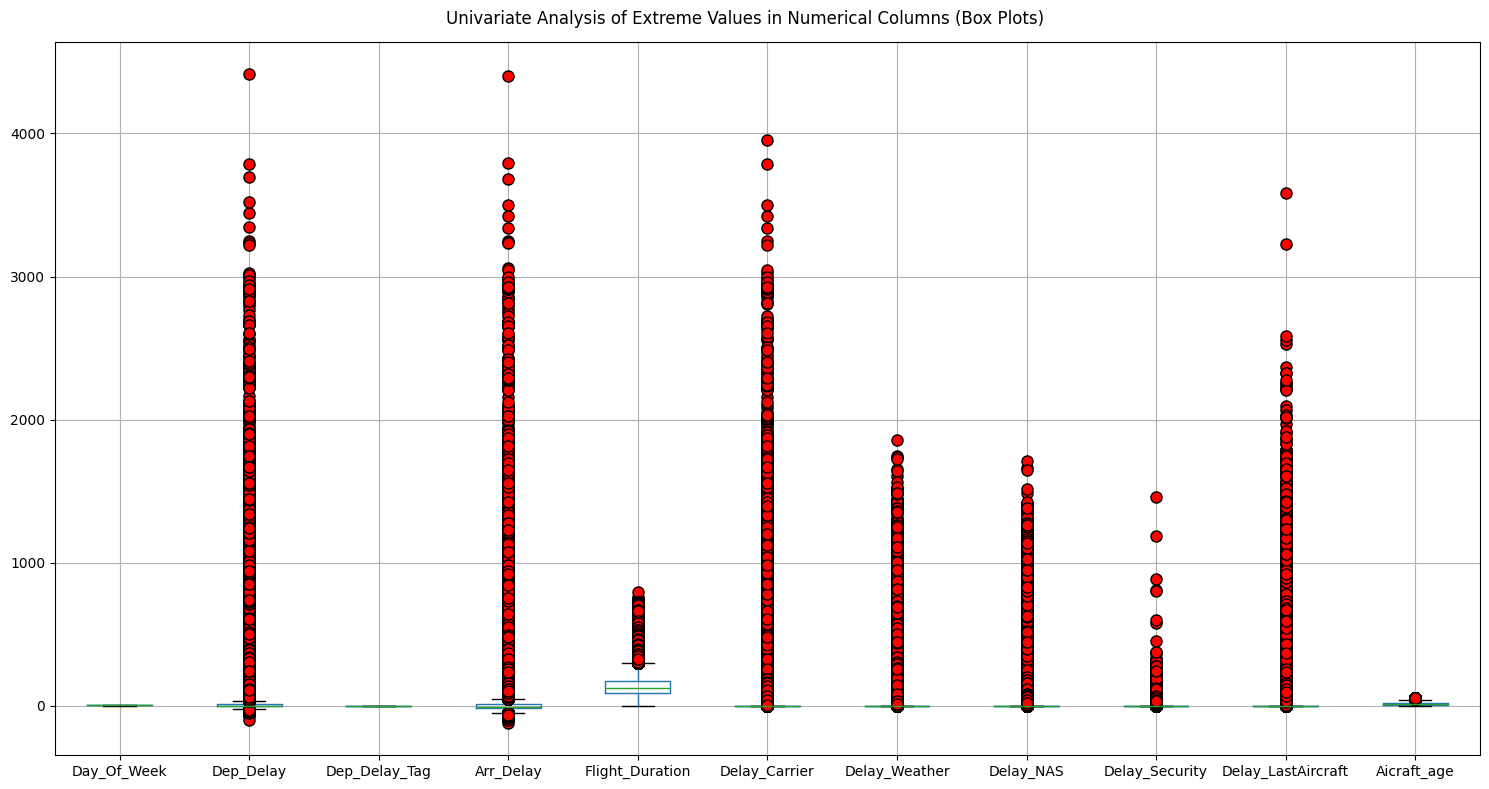

In [6]:
# Selection of Numerical Columns for Plotting (excluding 'index')
numeric_columns = df_flight.select_dtypes(include=["int64", "float64"]).drop(
    columns=["index"]
)

# Box plots of numerical data with outliers marked in red
numeric_columns.boxplot(
    figsize=(15, 8), flierprops=dict(marker="o", markerfacecolor="r", markersize=8)
)

plt.suptitle("Univariate Analysis of Extreme Values in Numerical Columns (Box Plots)")

plt.tight_layout()
plt.show()

## 2 - Numerical Data

**General Context:**

In [7]:
# Number of Flights
flight_count = len(df_flight)

print(f"- There are {flight_count} flights in the year 2023, which is {round(flight_count/1000000,2)} million.")
print(f"- On average, this represents {round((flight_count/365)/1000,2)}k flights per day in 2023.")
print(f"- The average age of the aircraft is {round(df_flight['Aicraft_age'].mean(),2)} years.")
print(f"- The total flight hours for the year amount to {round(df_flight['Flight_Duration'].sum()/60000000,2)} million hours.")
print(f"- The average flight duration in 2023 is {round(df_flight['Flight_Duration'].mean()/60,2)} hours.")

- There are 6743404 flights in the year 2023, which is 6.74 million.
- On average, this represents 18.48k flights per day in 2023.
- The average age of the aircraft is 13.48 years.
- The total flight hours for the year amount to 15.77 million hours.
- The average flight duration in 2023 is 2.34 hours.


**Distribution of Flights by Airline**

We obtain a ranking of airlines based on the number of flights operated in 2023, with **"Southwest Airlines" in the first position with a presence rate of 21.08%**.

The distribution is non-uniform, ranging from a maximum of 21.08% to a minimum of 1.18% for "Hawaiian Airline Inc". We note that **the top five busiest airlines together represent 70% of the civil aviation activity**.


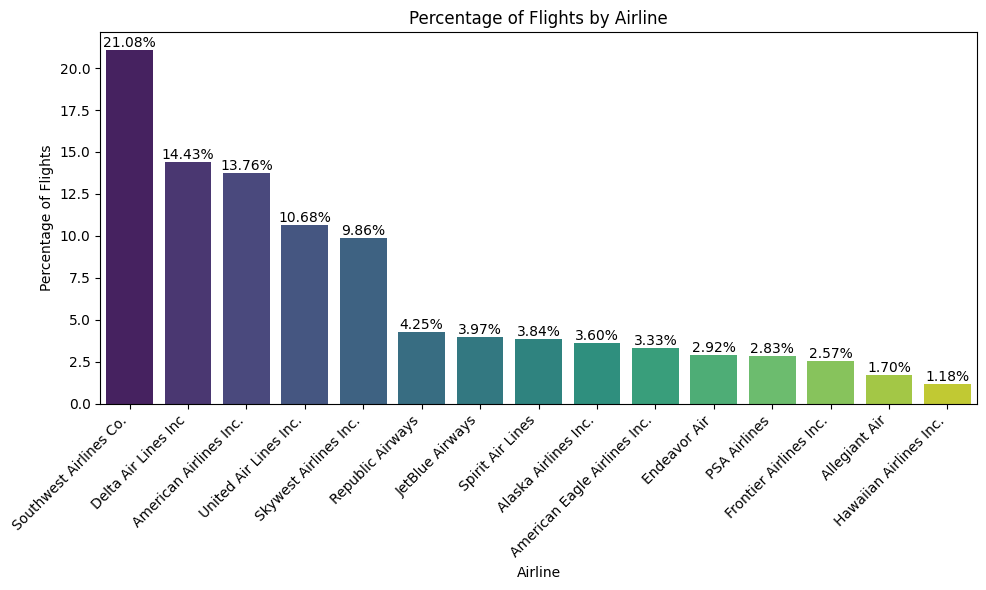

In [8]:
# Calculation of Total Number of Flights
total_flights = len(df_flight)

# Calculation of Number of Flights per Airline
flight_counts = df_flight["Airline"].value_counts()

# Calculation of Flight Percentages per Airline
flight_percentages = (flight_counts / total_flights) * 100

# Creating the Bar Plot with Percentages Displayed
plt.figure(figsize=(10, 6))
sns.barplot(
    x=flight_percentages.index, y=flight_percentages.values, palette="viridis"
)  # Creating the plot
plt.title("Percentage of Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Percentage of Flights")
plt.xticks(rotation=45, ha="right")  # Rotating x-axis labels for better readability
for i, value in enumerate(flight_percentages.values):
    plt.text(
        i, value, f"{value:.2f}%", ha="center", va="bottom"
    )  # Displaying percentages above each bar
plt.tight_layout()
plt.show()

**Distribution of Flights by Day of the Week**

We observe a **uniform distribution across the days of the week** with a slight increase on Thursday/Friday (14.8%) and a slight decrease in departure volumes on Saturday (12.92%).

/tmp/ipykernel_27440/2408701931.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(week_days)


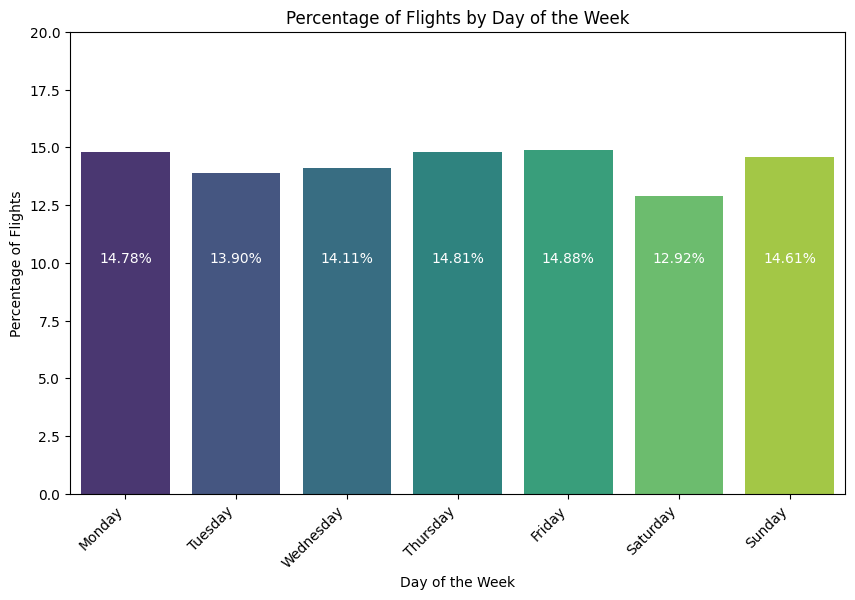

In [9]:
### Calculation of Total Number of Flights
total_flights = len(df_flight)

# Calculation of Number of Flights per Day of the Week
flight_counts = df_flight.groupby("Day_Of_Week")["index"].count()

# Calculation of Flight Percentages per Day of the Week
flight_percentages = (flight_counts / total_flights) * 100

# Creating the Bar Plot with Percentages Displayed at the bottom in white
plt.figure(figsize=(10, 6))
sns.barplot(
    x=flight_percentages.index, y=flight_percentages.values, palette="viridis"
)  # Creating the plot
plt.title("Percentage of Flights by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Percentage of Flights")

# Renaming x-axis labels
week_days = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
plt.gca().set_xticklabels(week_days)

plt.xticks(rotation=45, ha="right")  # Rotating x-axis labels for better readability
for i, value in enumerate(flight_percentages.values):
    plt.text(
        i, 10, f"{value:.2f}%", ha="center", va="baseline", color="white"
    )  # Displaying percentages at the bottom of each bar in white

# Setting y-axis from 0 to 20
plt.ylim(0, 20)

# plt.tight_layout()  # Automatically adjust layout to avoid overlapping
plt.show()

**Distribution of Flight Counts by Manufacturer**

**BOEING** alone represents **46.3% of US flights**. In contrast, **AIRBUS accounts for 29.39%**, which is about a third fewer flights.

**DIAMOND AIRCRAFT is not represented** in this graph because it consists of a single tourist aircraft, model DA40, which only flew 3 times during the year.


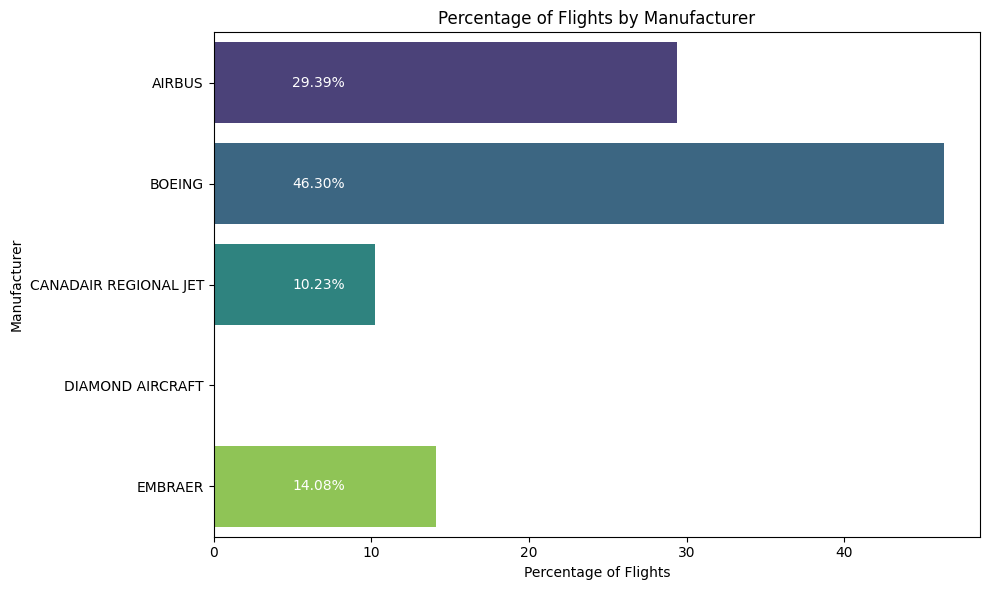

In [10]:
# Calculation of Number of Flights by Manufacturer
flight_counts = df_flight.groupby("Manufacturer")["index"].count()

# Calculation of Manufacturer Flight Percentages
flight_percentages = (flight_counts / total_flights) * 100

# Horizontal Bar Plot with Percentages Displayed at the bottom in white
plt.figure(figsize=(10, 6))
sns.barplot(
    x=flight_percentages.values, y=flight_percentages.index, palette="viridis"
)  # Using barplot with values on x-axis and labels on y-axis

plt.title("Percentage of Flights by Manufacturer")
plt.xlabel("Percentage of Flights")

# Displaying percentages at x-coordinate 5
for i, value in enumerate(flight_percentages.values):
    plt.text(5, i, f"{value:.2f}%", ha="left", va="center", color="white")

plt.tight_layout()  # Automatically adjust layout to avoid overlapping
plt.show()

**Focus on Delays**

In [11]:
# Creation of a dataset for delayed flights analysis
only_late_flight = df_flight[df_flight["Arr_Delay"] > 0].copy()

# Counting the number of delayed flights
count_late_flight = len(only_late_flight)

# Finding the most delayed flight
Delay_max = round(only_late_flight["Arr_Delay"].max(), 2)

# Displaying numerical information
print(
    f"- {count_late_flight} flights are affected by arrival delays, representing {round((count_late_flight * 100) / len(df_flight),2)}% of all flights."
)

print(
    f"\n- The average delay for these flights is {round(only_late_flight['Arr_Delay'].mean(),2)} minutes with a median value of {round(only_late_flight['Arr_Delay'].median(),2)} minutes."
)

print(
    f"\n- The maximum delay is {Delay_max} minutes, which is {round(Delay_max/60,2)} hours."
)

- 2472530 flights are affected by arrival delays, representing 36.67% of all flights.

- The average delay for these flights is 41.54 minutes with a median value of 18.0 minutes.

- The maximum delay is 4405 minutes, which is 73.42 hours.


When observing the distribution of delays by frequency, we find **a normal distribution of delays** centered around the mean of 41 minutes, with a gradual spread of frequencies towards the maximum of 4405 minutes.

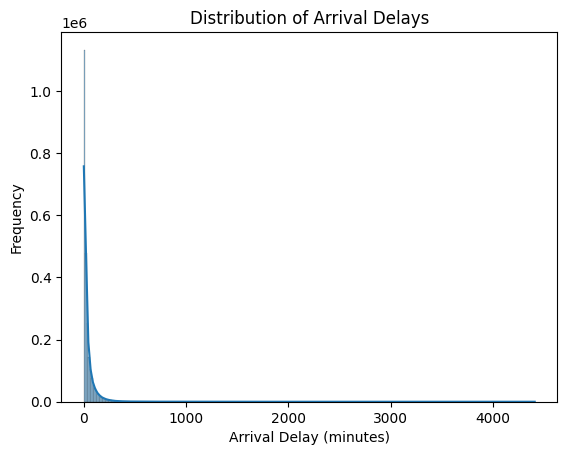

In [12]:
# Distribution of Arrival Delays

sns.histplot(data=only_late_flight, x="Arr_Delay", bins=300, kde=True)

# Adding titles and labels
plt.title("Distribution of Arrival Delays")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")

# Displaying the plot
plt.show()

Similarly, for the monthly distribution of arrival delays, we observe **low seasonality in the summer months from June to August**.

Conversely, **November experiences the least impact** from delays.

Once again, we notice **a potential initial correlation between departure delays and arrival delays**.

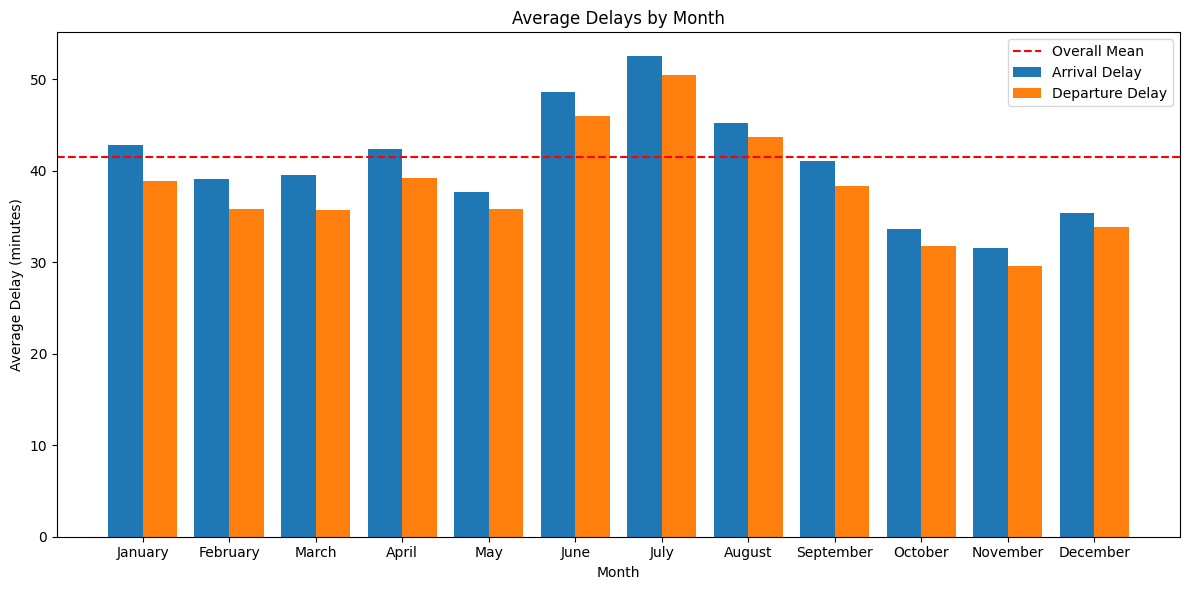

In [13]:
# Grouping Data by Month and Calculating Average Delays for Each Month
only_late_flight["Month"] = only_late_flight["FlightDate"].dt.month
monthly_delay = only_late_flight.groupby("Month")["Arr_Delay"].mean()
monthly_dep_delay = only_late_flight.groupby("Month")[
    "Dep_Delay"
].mean()  # Calculating average departure delays per month

# Calculating the overall mean of arrival delays
global_mean_arrival = only_late_flight["Arr_Delay"].mean()

plt.figure(figsize=(12, 6))

# Bar plot of average arrival delays per month
plt.bar(monthly_delay.index, monthly_delay.values, width=0.4, label="Arrival Delay")

# Bar plot of average departure delays per month
plt.bar(
    monthly_dep_delay.index + 0.4,
    monthly_dep_delay.values,
    width=0.4,
    label="Departure Delay",
)

# Adding the overall mean of arrival delays as a horizontal line
plt.axhline(y=global_mean_arrival, color="r", linestyle="--", label="Overall Mean")

# Adding titles and labels
plt.title("Average Delays by Month")
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")

# Modifying labels to display month names
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
plt.xticks(monthly_delay.index + 0.2, [months[i - 1] for i in monthly_delay.index])

plt.legend()

plt.tight_layout()
plt.show()

On the airline side, **Airbus accumulates the highest average delays**, whereas **Boeing generates the lowest cumulative average delays**.

Thus, the various technical issues faced by Boeing (widely reported in the media) did not impact the 2023 data.


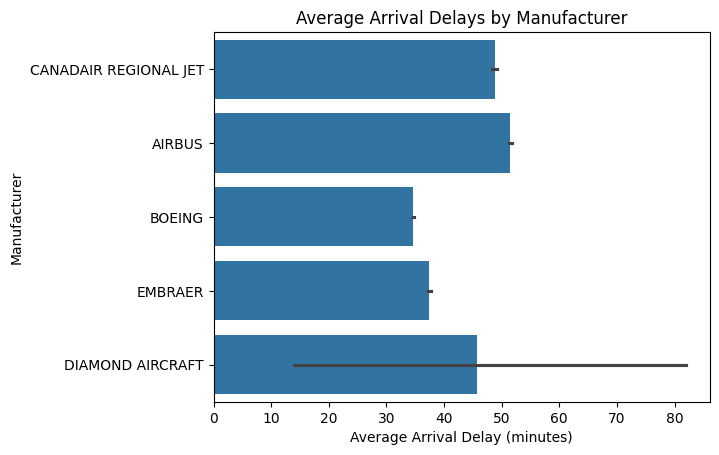

In [14]:
# Horizontal Bar Plot of Average Arrival Delays by Manufacturer

sns.barplot(data=only_late_flight, y="Manufacturer", x="Arr_Delay")

# Adding titles and labels
plt.title("Average Arrival Delays by Manufacturer")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Manufacturer")

plt.show()

**Let's observe the concentration of average departure delays with a ranking by airport (top 20).**

The Orlando airport in Florida stands out due to a high average departure delay of nearly 20 minutes compared to a national average of 12.7 minutes.


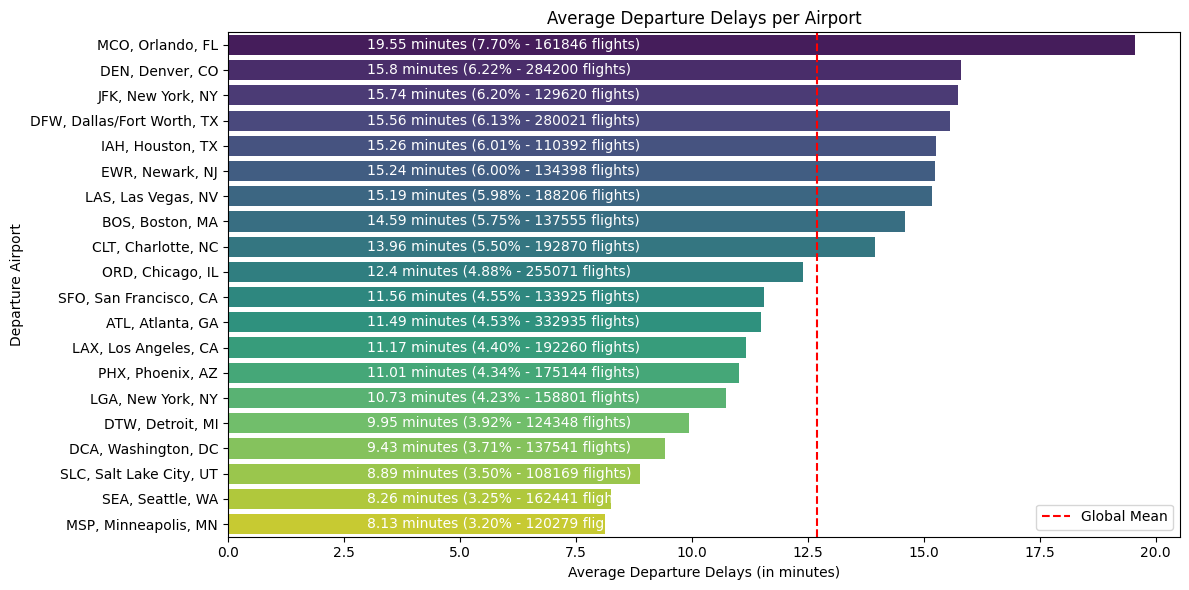

Global average delay: 12.7 minutes


In [15]:
# Calculation + ranking (20) of average departure delays per airport
Airports_delays = (
    df_flight.groupby(["Dep_Airport", "Dep_CityName"])
    .agg({"Dep_Delay": "mean", "index": "count"})
    .reset_index()
)
Airports_delays = Airports_delays.sort_values(by="index", ascending=False).head(20)
Airports_delays["Dep_Delay"] = round(Airports_delays["Dep_Delay"], 2)

# Average departure delays per airport in minutes
Dep_delay_mean = Airports_delays["Dep_Delay"].mean()

# Total sum of average delays per airport to calculate percentages
total_delay_mean = Airports_delays["Dep_Delay"].sum()

# Ranking airports in descending order by average departure delays
Airports_delays_rank = (
    Airports_delays.sort_values(by="Dep_Delay", ascending=False).head(20).reset_index()
)

# Calculation of percentage for each average delay compared to the total average delay
Airports_delays_rank["Percentage"] = (
    Airports_delays_rank["Dep_Delay"] / total_delay_mean
) * 100

# Concatenation of columns 'Dep_Airport' and 'Dep_CityName' to avoid duplicates like 'New York'
Airports_delays_rank["Dep_Airport_City"] = Airports_delays_rank["Dep_Airport"].str.cat(
    Airports_delays_rank["Dep_CityName"], sep=", "
)

# Horizontal bar plot with average departure delays per airport
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=Airports_delays_rank["Dep_Delay"],
    y=Airports_delays_rank["Dep_Airport_City"],
    palette="viridis",
)

plt.title("Average Departure Delays per Airport")
plt.xlabel("Average Departure Delays (in minutes)")
plt.ylabel("Departure Airport")

# Displaying the global average line
plt.axvline(x=Dep_delay_mean, color="r", linestyle="--", label="Global Mean")

# Displaying values per airport
for i, (value, percent, count) in enumerate(
    zip(
        Airports_delays_rank["Dep_Delay"],
        Airports_delays_rank["Percentage"],
        Airports_delays_rank["index"],
    )
):
    plt.text(
        3,
        i,
        f"{value} minutes ({percent:.2f}% - {count} flights)",
        ha="left",
        va="center",
        color="white",
    )

plt.legend()  # Adding legend for the global mean line

plt.tight_layout()
plt.show()

print(f"Global average delay: {round(Dep_delay_mean,2)} minutes")

**Let's use a map to visualize these average delays by airport:**
The 20 airports with the highest departure delays are spread across the entire US territory.

A higher concentration can be observed on the northeast coast around New York.

In [16]:
# Path vers la base Kaggle
link_path2 = "../data/US 2023 Civil Flights  delays meteo and aircrafts/airports_geolocation.csv"

# Import flights dataset
df_airport = pd.read_csv(link_path2)

Airports_delays = pd.merge(Airports_delays, df_airport[['IATA_CODE','LATITUDE', 'LONGITUDE']], left_on='Dep_Airport', right_on='IATA_CODE', how='left')

In [17]:
# Create a map centered on the United States
m = folium.Map(location=[37, -95], zoom_start=5, width="80%", height="80%")

# Add a title to the map
title_html = '<h3 align="left" style="font-size:20px"><b>RANK 20 - Airports with the most departure delays</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

# Add a marker for each airport with a circle size proportional to the departure delay
for index, row in Airports_delays.iterrows():
    radius = row["Dep_Delay"] * 10000  # Multiply by a value to adjust circle size
    folium.Circle(
        location=[row["LATITUDE"], row["LONGITUDE"]],  # Airport location
        radius=radius,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.3,  # Increased transparency
        popup=f"{row['Dep_Airport']} - {row['Dep_CityName']}\nDelay: {row['Dep_Delay']} minutes",
    ).add_to(m)

# Display the map
m

**Having identified and quantified the delays, let's now move to a more in-depth analysis of the dependencies between the various variables in this dataset.**

# 3 - Dependencies Analysis

We have observed repeatedly a potential dependency between departure and arrival delays. Using a linear regression line (degree 1 polynomial), it is evident that departure and arrival delays are highly correlated (coef: 0.97 out of 1).

Next, we need to understand the origin of these departure delays by analyzing their dependencies with other numerical data and categorical data such as departure time period and flight type.

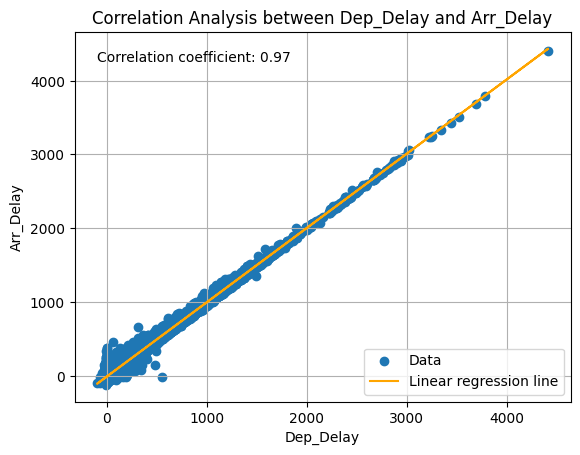

In [18]:
# Declaration of columns to study
x = df_flight["Dep_Delay"]
y = df_flight["Arr_Delay"]

# Finding the line of linear regression (polynomial of degree 1) in the data
slope, intercept = np.polyfit(x, y, 1)

# Calculation of the correlation coefficient
correlation = np.corrcoef(x, y)[0, 1]

# Plotting the scatter plot and the linear regression line
plt.scatter(x, y, label="Data")
plt.plot(x, slope * x + intercept, color="orange", label="Linear regression line")

# Adding the correlation coefficient to the plot
plt.text(
    x.min(),
    y.max(),
    f"Correlation coefficient: {correlation:.2f}",
    verticalalignment="top",
)

# Adding labels and a title
plt.xlabel("Dep_Delay")
plt.ylabel("Arr_Delay")
plt.title("Correlation Analysis between Dep_Delay and Arr_Delay")

# Moving the legend to the upper right corner
plt.legend(loc="lower right")

# Display the plot
plt.grid(True)
plt.show()

Based on the correlation heatmap of departure delays, we observe the following relationships:

- There is a strong positive correlation of 0.72 with Carrier Delay.
- There is a strong positive correlation of 0.63 with Last Aircraft Delay.
- There are weaker correlations of +0.27 and +0.24 with Weather Delay and Air Traffic Control Delay, respectively.

Conversely, there is **no significant correlation** between departure delays and the following factors:
- Day of the week
- Time of day
- Flight duration
- Age of the aircraft
- Aircraft manufacturer
- Security control issues

Therefore, we will no longer focus on analyzing these factors in relation to departure delays. This analysis helps us understand which factors are strongly associated with departure delays and which ones are not, guiding further investigation and decision-making.

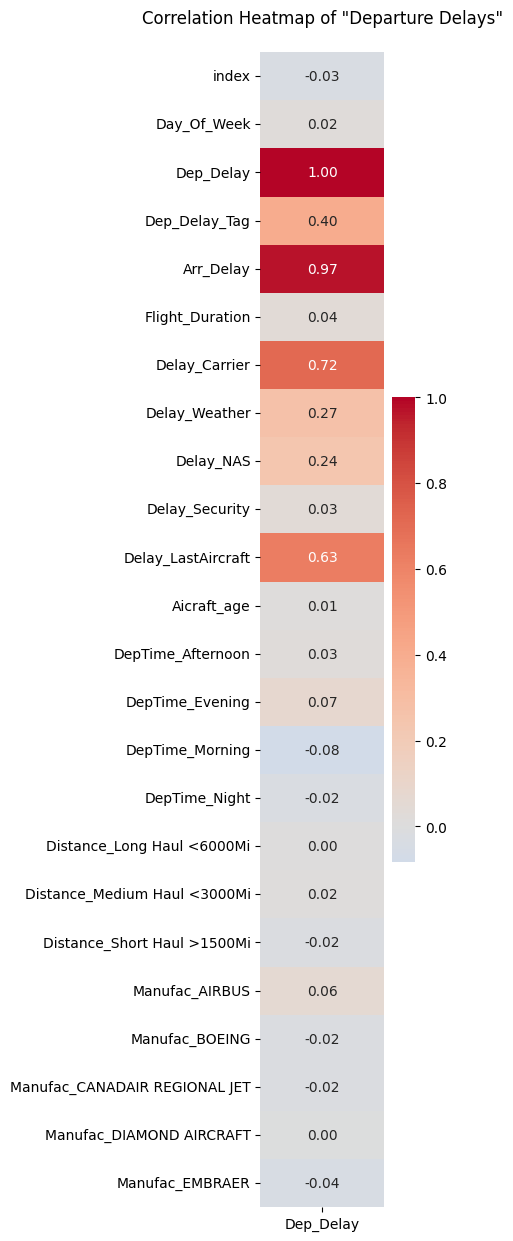

In [19]:
# Create a copy of the flight dataframe for correlation analysis
df_corr = df_flight.copy()

# Create dummy variables for 'DepTime_label' column
dummy_columns1 = pd.get_dummies(df_corr["DepTime_label"], prefix="DepTime", dtype=int)

# Concatenate dummy variables with the original dataframe
df_corr = pd.concat([df_corr, dummy_columns1], axis=1)

# Create dummy variables for 'Distance_type' column
dummy_columns2 = pd.get_dummies(df_corr["Distance_type"], prefix="Distance", dtype=int)

# Concatenate dummy variables with the original dataframe
df_corr = pd.concat([df_corr, dummy_columns2], axis=1)

# Create dummy variables for 'Manufacturer' column
dummy_columns3 = pd.get_dummies(df_corr["Manufacturer"], prefix="Manufac", dtype=int)

# Concatenate dummy variables with the original dataframe
df_corr = pd.concat([df_corr, dummy_columns3], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_corr.select_dtypes("number").corr()

# Extract the correlations related to 'Dep_Delay'
Dep_Delay_corr = correlation_matrix["Dep_Delay"]

# Display the correlation of 'Dep_Delay' using a heatmap
plt.figure(figsize=(2, 15))  # Adjust the figure size
heatmap = sns.heatmap(
    Dep_Delay_corr.to_frame(), annot=True, cmap="coolwarm", center=0, fmt=".2f"
)
heatmap.set_xticklabels(heatmap.get_xticklabels())  # Set the x-axis labels
plt.title('Correlation Heatmap of "Departure Delays"\n')  # Set the title of the heatmap
plt.show()

# Delete the temporary df_corr dataframe
del df_corr

# 4 - There's no point in running...

Let's take a closer look at the distribution of departure delays by airline.

It does indeed appear that certain airlines accumulate more departure delays.

This is the case with **American Airlines**, which **stands out due to the multitude of extraordinary delays** exceeding 33 hours.

/tmp/ipykernel_27440/2415809859.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(


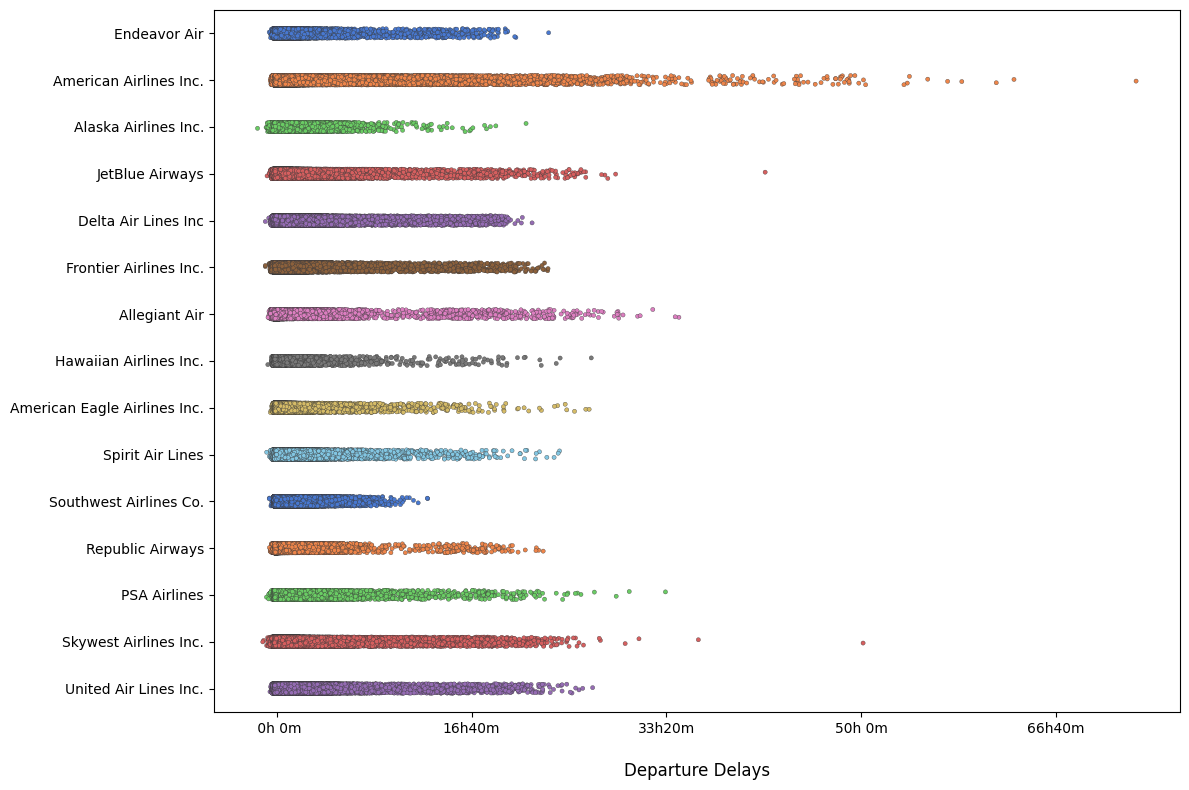

In [20]:
plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches

# Using a predefined color palette in Seaborn
palette = "muted"

# Creating the stripplot with the specified color palette
ax3 = sns.stripplot(
    y="Airline",
    x="Dep_Delay",
    size=3,
    palette=palette,
    data=df_flight,
    linewidth=0.25,
    jitter=True,
)

# Adjusting the font size of axis labels
plt.setp(ax3.get_xticklabels(), fontsize=10)
plt.setp(ax3.get_yticklabels(), fontsize=10)

# Formatting the x-axis labels to display hours and minutes
ax3.set_xticklabels(
    [
        "{:2.0f}h{:2.0f}m".format(*[int(y) for y in divmod(x, 60)])
        for x in ax3.get_xticks()
    ]
)

# Setting the x-axis label
plt.xlabel("\nDeparture Delays", fontsize=12)

# Hiding the y-axis label
ax3.yaxis.label.set_visible(False)

# Adjusting the layout of the plot
plt.tight_layout(w_pad=3)

# Displaying the plot
plt.show()

Let's draw a parallel with the number of airports visited for these long delays.

These numbers reveal significant **departure delays** (+16 hours) that **cannot be attributed to airports** since they are spread across 265 locations.

Thus, there is no congestion point at this level. The same applies to very long delays with 60 departure airports for only 118 flights.

In [21]:
print("Information about delays exceeding 16 hours and 40 minutes:")
print(
    "\nNumber of flights:",
    df_flight[df_flight["Dep_Delay"] > 984].shape[0],
    " which is",
    round(
        (((df_flight[df_flight["Dep_Delay"] > 984].shape[0]) / len(df_flight)) * 100), 4
    ),
    "%",
)
print(
    "Number of airports involved:",
    df_flight[df_flight["Dep_Delay"] > 984]["Dep_Airport"].nunique(),
    " out of",
    df_flight["Dep_Airport"].nunique(),
)

print("\nInformation about delays exceeding 33 hours and 20 minutes:")
print(
    "\nNumber of flights:",
    df_flight[df_flight["Dep_Delay"] > 1992].shape[0],
    " which is",
    round(
        (((df_flight[df_flight["Dep_Delay"] > 1992].shape[0]) / len(df_flight)) * 100),
        4,
    ),
    "%",
)
print(
    "Number of airports involved:",
    df_flight[df_flight["Dep_Delay"] > 1992]["Dep_Airport"].nunique(),
    " out of",
    df_flight["Dep_Airport"].nunique(),
)

Information about delays exceeding 16 hours and 40 minutes:

Number of flights: 3342  which is 0.0496 %
Number of airports involved: 265  out of 350

Information about delays exceeding 33 hours and 20 minutes:

Number of flights: 118  which is 0.0017 %
Number of airports involved: 60  out of 350


**Is there any missing data in the delays?**

If we filter the dataset to obtain the cumulative causes of delays per flight, we find **a time differential between the cumulative delays and the final arrival delay**.

This missing data applies to over 1 million flights, which is exactly **16.10% of flights containing unexplained delays**.

It is essential to document these delays to avoid biasing our analysis.

In [22]:
df_flight[((df_flight['Delay_Carrier'] + df_flight['Delay_LastAircraft'] + df_flight['Delay_Weather'] + df_flight['Delay_NAS'] + df_flight['Delay_Security']) != df_flight['Arr_Delay']) & (df_flight['Arr_Delay'] > 0) ][['FlightDate','Delay_Carrier','Delay_Weather','Delay_NAS','Delay_Security','Delay_LastAircraft', 'Dep_Delay', 'Arr_Delay']]

FlightDate  Delay_Carrier  Delay_Weather  Delay_NAS  Delay_Security  \
10      2023-01-10              0              0          0               0   
14      2023-01-15              0              0          0               0   
15      2023-01-16              0              0          0               0   
28      2023-01-31              0              0          0               0   
34      2023-01-12              0              0          0               0   
...            ...            ...            ...        ...             ...   
6743332 2023-12-31              0              0          0               0   
6743354 2023-12-31              0              0          0               0   
6743355 2023-12-31              0              0          0               0   
6743377 2023-12-31              0              0          0               0   
6743380 2023-12-31              0              0          0               0   

         Delay_LastAircraft  Dep_Delay  Arr_Delay  
10                        0        -15          6  
14                        0          5          4  
15                        0         -3         14  
28                        0         16         10  
34                        0         16         11  
...                     ...        ...        ...  
6743332                   0         -9          1  
6743354                   0         21         14  
6743355                   0         28         14  
6743377                   0          9          8  
6743380                   0         17          1  

[1085833 rows x 8 columns]

This new dataset reveals the cumulative delays encountered that could explain departure and arrival delays.

**Description of the added data:**

- **Delay_Missing**: Delays present in the data but not filled in
- **Sum_Delays**: Sum of filled and unfilled delays (excluding departure and arrival delays)
- **Absorption_delay**: Airline's ability to absorb these delays

In [23]:
# Extracting the delay dataset called 'Delay_view'
Delay_view = df_flight.loc[
    :,
    (
        "FlightDate",
        "Delay_Carrier",
        "Delay_Weather",
        "Delay_NAS",
        "Delay_Security",
        "Delay_LastAircraft",
        "Dep_Delay",
        "Arr_Delay",
    ),
]

# Initializing the new column 'Delay_Missing'
Delay_view["Delay_Missing"] = 0

# Adding the column for sum of documented delays
Delay_view["Sum_Delay"] = (
    Delay_view["Delay_Carrier"]
    + Delay_view["Delay_LastAircraft"]
    + Delay_view["Delay_Weather"]
    + Delay_view["Delay_NAS"]
    + Delay_view["Delay_Security"]
)

# Initializing the new column 'Absorption_Delay'
Delay_view["Absorption_Delay"] = 0

# Function to calculate missing delay data
Delay_view["Delay_Missing"] = Delay_view.apply(
    lambda x: x["Arr_Delay"] if (x["Sum_Delay"] == 0) & (x["Arr_Delay"] > 0) else 0,
    axis=1,
)
Delay_view["Absorption_Delay"] = Delay_view.apply(
    lambda x: (x["Dep_Delay"] - x["Arr_Delay"])
    if (x["Sum_Delay"] > x["Arr_Delay"]) & (x["Dep_Delay"] > 0)
    else 0,
    axis=1,
)

# Updating 'Sum_Delay' to include 'Delay_Missing'
Delay_view["Sum_Delay"] = Delay_view["Sum_Delay"] + Delay_view["Delay_Missing"]

# Displaying the target data
Delay_view.head(20)

FlightDate  Delay_Carrier  Delay_Weather  Delay_NAS  Delay_Security  \
0  2023-01-02              0              0          0               0   
1  2023-01-03              0              0          0               0   
2  2023-01-04              0              0          0               0   
3  2023-01-05              0              0          0               0   
4  2023-01-06              0              0          0               0   
5  2023-01-07              0              0          0               0   
6  2023-01-14              0              0          0               0   
7  2023-01-21              0              0          0               0   
8  2023-01-28              0              0          0               0   
9  2023-01-09              0              0          0               0   
10 2023-01-10              0              0          0               0   
11 2023-01-11              0              0         26               0   
12 2023-01-12             50              0          0               0   
13 2023-01-13              0              0         34               0   
14 2023-01-15              0              0          0               0   
15 2023-01-16              0              0          0               0   
16 2023-01-17              0              0         40               0   
17 2023-01-18              0              0          0               0   
18 2023-01-19              0            667          0               0   
19 2023-01-20              0              0         36               0   

    Delay_LastAircraft  Dep_Delay  Arr_Delay  Delay_Missing  Sum_Delay  \
0                    0         -3        -12              0          0   
1                    0         -5         -8              0          0   
2                    0         -5        -21              0          0   
3                    0         -6        -17              0          0   
4                    0         -1        -16              0          0   
5                    0        -10        -13              0          0   
6                    0         -8        -31              0          0   
7                    0        -10        -25              0          0   
8                    0         -5        -15              0          0   
9                    0         -7         -3              0          0   
10                   0        -15          6              6          6   
11                  35         35         61              0         61   
12                  82        132        132              0        132   
13                   0         -5         34              0         34   
14                   0          5          4              4          4   
15                   0         -3         14             14         14   
16                   0         15         40              0         40   
17                   0         -7         -2              0          0   
18                   6        676        673              0        673   
19                   0        -10         36              0         36   

    Absorption_Delay  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  
6                  0  
7                  0  
8                  0  
9                  0  
10                 0  
11                 0  
12                 0  
13                 0  
14                 0  
15                 0  
16                 0  
17                 0  
18                 0  
19                 0

Now we can observe these delays by airline, aggregating all raw delays (without considering potential advancements in flight).

In [25]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Assuming df_flight and Delay_view are already defined

# Concatenating the new columns with the original dataset (df_flight)
df_flight = pd.concat(
    [df_flight, Delay_view[["Sum_Delay", "Delay_Missing", "Absorption_Delay"]]], axis=1
)

# Grouping and aggregating the data
Airline_delay = df_flight.groupby("Airline").agg(
    {
        "Dep_Delay": "mean",
        "Arr_Delay": "mean",
        "Sum_Delay": "mean",
        "Delay_Carrier": "mean",
        "Delay_LastAircraft": "mean",
        "Delay_Weather": "mean",
        "Delay_NAS": "mean",
        "Delay_Security": "mean",
        "Delay_Missing": "mean",
        "Absorption_Delay": "mean",
    }
)

Sum_Delay_Mean = df_flight["Sum_Delay"].mean()

# Adding the number of flights by counting occurrences in the 'Airline' column
Airline_delay["Number_of_flights"] = df_flight["Airline"].value_counts()

# Sorting data by the mean of cumulative delays ('Sum_Delay') and resetting the index
Airline_delay = Airline_delay.sort_values(by="Sum_Delay", ascending=False).reset_index()

# Creating a horizontal stacked bar chart
fig = px.bar(
    Airline_delay,
    x="Airline",
    y=[
        "Delay_Carrier",
        "Delay_LastAircraft",
        "Delay_Weather",
        "Delay_NAS",
        "Delay_Security",
        "Delay_Missing",
    ],
    title="Cumulative delays (raw) by airline",
    barmode="stack",
    labels={"value": "Cumulative Delay", "variable": "Delay Type"},
    color_discrete_sequence=px.colors.qualitative.Vivid,
)

# Set the name attribute for df_flight
df_flight.name = "Flights"

# Adding a horizontal line representing the average of the sum of delays
fig.add_shape(
    type="line",
    x0=-1,
    x1=15,
    y0=Sum_Delay_Mean,
    y1=Sum_Delay_Mean,
    line=dict(color="red", width=2, dash="dash"),
)

# Adding annotation for the global average title
fig.add_annotation(
    x=13,
    y=(Sum_Delay_Mean + 1),
    text="Global Average",
    showarrow=False,
    font=dict(color="red", size=12),
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In this form, it appears that cumulative delays by airline are strongly influenced by 'Carrier', 'Last Aircraft', and 'NAS' delays.

We obtain a ranking of airlines most prone to cumulative delays.

Now, let's observe their ability to absorb these delays in flight.

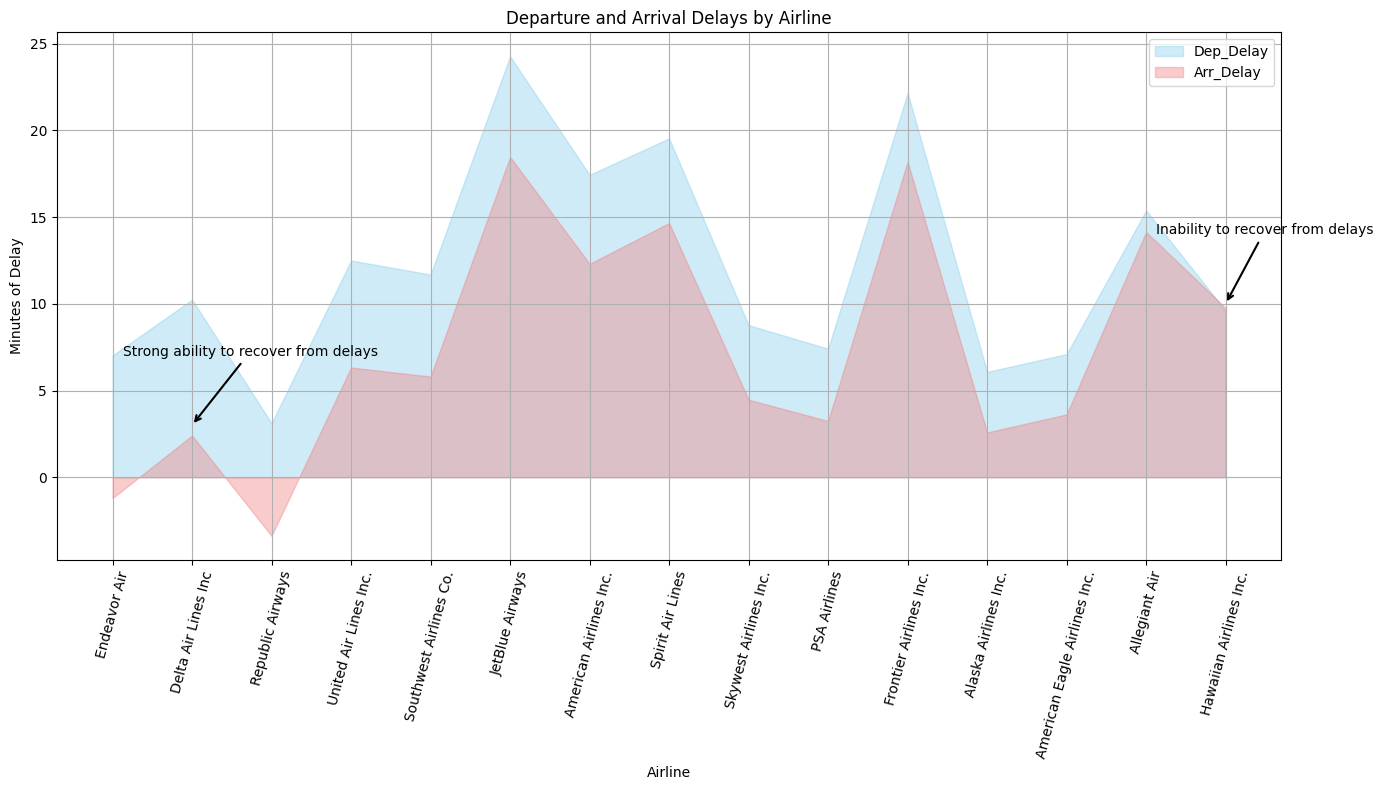

RANKING OF AIRLINES BY DELAY ABSORPTION CAPACITY (min)


Airline  Delay_Absorption
12                  Endeavor Air          8.224235
9            Delta Air Lines Inc          7.834353
14              Republic Airways          6.493358
5          United Air Lines Inc.          6.166641
10        Southwest Airlines Co.          5.884195
0                JetBlue Airways          5.800116
4         American Airlines Inc.          5.134204
2               Spirit Air Lines          4.881420
6          Skywest Airlines Inc.          4.298235
7                   PSA Airlines          4.170208
1         Frontier Airlines Inc.          3.968096
13          Alaska Airlines Inc.          3.489699
11  American Eagle Airlines Inc.          3.477866
3                  Allegiant Air          1.246118
8         Hawaiian Airlines Inc.         -0.178741

In [26]:
Airline_delay["Delay_Absorption"] = (
    Airline_delay["Dep_Delay"] - Airline_delay["Arr_Delay"]
)
Airline_delay = Airline_delay.sort_values(by="Delay_Absorption", ascending=False)

# Initialization of x and y axis values
x = Airline_delay["Airline"]
y1 = Airline_delay["Dep_Delay"]
y2 = Airline_delay["Arr_Delay"]

plt.figure(figsize=(14, 8))

# Area plot
plt.fill_between(x, y1, color="skyblue", alpha=0.4, label="Dep_Delay")
plt.fill_between(x, y2, color="lightcoral", alpha=0.4, label="Arr_Delay")

# Annotations
plt.annotate(
    "Inability to recover from delays",
    xy=("Hawaiian Airlines Inc.", 10),
    xytext=(-50, 50),  # Text position relative to annotated point
    textcoords="offset points",  # Text offset from point
    arrowprops=dict(arrowstyle="->", lw=1.5, color="black"),  # Arrow style
)
plt.annotate(
    "Strong ability to recover from delays",
    xy=("Delta Air Lines Inc", 3),
    xytext=(-50, 50),  # Text position relative to annotated point
    textcoords="offset points",  # Text offset from point
    arrowprops=dict(arrowstyle="->", lw=1.5, color="black"),  # Arrow style
)

# Add labels, title, and legend
plt.xlabel("Airline")
plt.ylabel("Minutes of Delay")
plt.title("Departure and Arrival Delays by Airline")
plt.legend()

# Display the graph
plt.grid(True)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# Display the associated dataset
print("RANKING OF AIRLINES BY DELAY ABSORPTION CAPACITY (min)")
Airline_delay[["Airline", "Delay_Absorption"]]

# **CONCLUSIONS**

**DATA**

- 36.67% of flights experience a delay upon landing.
- The average delay for these flights is 41.54 minutes, with a median value of 18.0 minutes.
- The maximum delay reached 4,405 minutes, which is 73.42 hours.

**FACTORS**

- We observed a strong correlation between landing delays and takeoff delays (Pearson coefficient: +0.97).
- Takeoff delays are primarily influenced by airline-related delays (Delay Carrier, Delay Last Aircraft).
- Lastly, we discovered that airlines do not manage their delays evenly.

**IMPROVEMENT AXIS**

- Study the impact of runway-generated delays by airlines at each airport.

**MACHINE LEARNING INFO**:

Here is a ranking of data based on their importance in developing a machine learning model.

*CORRELATED AND ACTIONABLE DATA*:

- Takeoff delays (+0.97)
- Associated delays: Delay_Carrier (+0.72), Delay_LastAircraft (+0.63)
- Weaker correlations: weather-related delays (Delay_Weather (+0.27)) and delays from the National Airspace System (Delay_NAS (+0.24))
- Ranking of delays by airline
- Delay absorption capacity by airline

*NON-CORRELATED DATA*:

There is no relationship between takeoff delays and the day of the week, time of day, flight duration, age of the aircraft, or aircraft manufacturer. The same applies to security control issues.